#Exercicio Subamostragem e Sobamostragem

##Carregamento da base de dados

In [158]:
import pandas as pd
import random
import numpy as np

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
path = '/content/drive/MyDrive/EstatisticaUdemy/Arquivos/BasesDeDados/csv_result-ebay_confianca_completo.csv'

dataset = pd.read_csv(path)
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [161]:
blacklist = dataset['blacklist'].value_counts()
blacklist

N    5022
B     784
Name: blacklist, dtype: int64

###Atentar-se a correção nesta parte para entender

####Trocar para que o modelo entenda. Ficou entre True e False

In [162]:
dataset['blacklist'] = dataset['blacklist'] == 'S'
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


##Continuação

In [163]:
dataset.shape

(5806, 75)

In [164]:
X = dataset.iloc[:, 0:74].values

In [165]:
y = dataset.iloc[:, 74].values

In [166]:
X.shape, y.shape

((5806, 74), (5806,))

In [167]:
X

array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [168]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

##Base de treinamento

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [171]:
X_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [172]:
X_teste.shape, y_teste.shape

((1162, 74), (1162,))

In [173]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [174]:
4299 / len(dataset), 1507 / len(dataset)

(0.7404409231829142, 0.2595590768170858)

In [175]:
np.unique(y_treinamento, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3439, 1205]))

In [176]:
1205 / len(y_treinamento)

0.2594745908699397

In [177]:
np.unique(y_teste, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([860, 302]))

In [178]:
302 / len(y_teste)

0.25989672977624784

##Classificação com RandomForest

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [181]:
previsoes = modelo.predict(X_teste)
previsoes

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object)

In [182]:
y_teste

array(['Bom', 'Bom', 'Ruim', ..., 'Ruim', 'Bom', 'Bom'], dtype=object)

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_score(previsoes, y_teste)

0.7452667814113597

In [185]:
from sklearn.metrics import confusion_matrix

In [224]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[853, 289],
       [  7,  13]])

In [187]:
import seaborn as sns

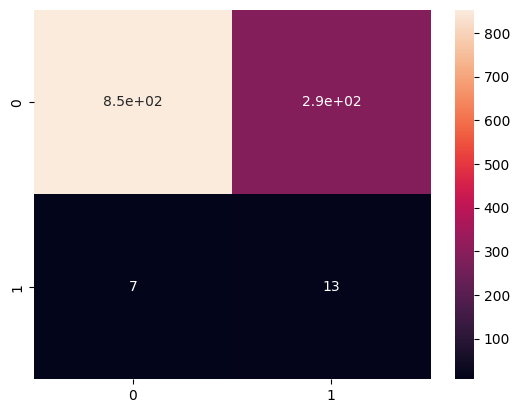

In [188]:
sns.heatmap(cm, annot=True);

In [225]:
(853 + 13) / (853 + 13 + 7 + 289)

0.7452667814113597

In [226]:
#Percentual que pagam
pagadores_rd = 853 / (857 + 289)
pagadores_rd

0.7443280977312391

In [228]:
#Percentual que não pagam
nao_pagadores_rd = 13 / (13 + 7)
nao_pagadores_rd

0.65

In [192]:
#Perdas: 5000
#Clientes não pagadores: 1000
1000 * 25/100

250.0

In [193]:
print(f'Parcial de prejuizo do banco: R$ {250 * 5000:.2f}')

Parcial de prejuizo do banco: R$ 1250000.00


##Classificação com Subamostragem

In [194]:
from imblearn.under_sampling import TomekLinks

In [195]:
tl = TomekLinks(sampling_strategy='majority')
X_sub, y_sub = tl.fit_resample(X, y)

In [196]:
X_sub.shape, y_sub.shape

((5417, 74), (5417,))

In [197]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [198]:
np.unique(y_sub, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [199]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_sub,
                                                                          y_sub,
                                                                          test_size=0.2,
                                                                          stratify=y_sub)

In [200]:
X_treinamento_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [201]:
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(y_teste_u,previsoes_u )

0.7250922509225092

In [202]:
cm_u = confusion_matrix(y_teste_u, previsoes_u)
cm_u

array([[771,  11],
       [287,  15]])

In [221]:
pagadores_sub = 771 / (771 + 287)
pagadores_sub

0.7287334593572778

In [223]:
nao_pagadores_sub = 15 / (11 + 15)
nao_pagadores_sub

0.5769230769230769

##Classificação com Sobamostragem

In [205]:
from imblearn.over_sampling import SMOTE

In [206]:
smote = SMOTE(sampling_strategy='minority')
X_sob, y_sob = smote.fit_resample(X, y)

In [207]:
X_sob.shape, y_sob.shape

((8598, 74), (8598,))

In [208]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [209]:
np.unique(y_sob, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [210]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_sob, y_sob,
                                                                          test_size = 0.2,
                                                                          stratify=y_sob)

In [211]:
X_treinamento_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [214]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8226744186046512

In [218]:
cm_o = confusion_matrix(y_teste_o, previsoes_o)
cm_o

array([[704, 156],
       [149, 711]])

In [219]:
pagadores_sob = 704 / (704 + 156)
pagadores_sob

0.8186046511627907

In [220]:
nao_pagadores_sob = 711 / (711 + 149)
nao_pagadores_sob

0.8267441860465117

##Comparações

In [229]:
pagadores_rd, nao_pagadores_rd

(0.7443280977312391, 0.65)

In [230]:
pagadores_sub, nao_pagadores_sub

(0.7287334593572778, 0.5769230769230769)

In [231]:
pagadores_sob, nao_pagadores_sob

(0.8186046511627907, 0.8267441860465117)

In [ ]:
#Perdas: 5000
#Clientes não pagadores: 1000

###RD

In [236]:
rd = 1000 * (1 - pagadores_rd)

In [237]:
prejuizo_rd = 5000 * rd
print(f'Prejuizo do banco: R$ {prejuizo_rd:.2f}')

Prejuizo do banco: R$ 1278359.51


###SUB

In [238]:
sub = 1000 * (1 - pagadores_sub)

In [239]:
prejuizo_sub = 5000 * sub
print(f'Prejuizo do banco: R$ {prejuizo_sub:.2f}')

Prejuizo do banco: R$ 1356332.70


###SOB

In [240]:
sob = 1000 * (1 - pagadores_sob)

In [241]:
prejuizo_sob = 5000 * sob
print(f'Prejuizo do banco: R$ {prejuizo_sob:.2f}')

Prejuizo do banco: R$ 906976.74


In [243]:
print(f'Economia de: R$ {prejuizo_rd - prejuizo_sob:.2f}')

Economia de: R$ 371382.77
